In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import pulp

import sys
sys.path.insert(0, '../..')
import leximin_assignment

from tqdm import tqdm
import time

import warnings

In [2]:
cost_matrix = np.random.uniform(size=(5, 5))
cost_matrix

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215],
       [0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443]])

In [3]:
leximin_assigner = leximin_assignment.LeximinAssignmentHelperV3(
    cost_matrix, np.ones((10,))
)

assignments = leximin_assigner.solve(verbose=True)
assignments

Running from the beginning...
Number of agents assigned: 0 / 5
Current leximin: 1
Number of agents assigned: 1 / 5
Current leximin: 0.5448831829968969
Number of agents assigned: 2 / 5
Current leximin: 0.46147936225293185
Number of agents assigned: 3 / 5
Current leximin: 0.4375872112626925
Number of agents assigned: 4 / 5
Current leximin: 0.08712929970154071


array([3, 1, 4, 0, 2])

In [4]:
N = 20
N_EXPERIMENTS = 100

times1 = []
times2 = []

for _ in tqdm(range(N_EXPERIMENTS)):
    try:
        cost_matrix = np.random.uniform(size=(N, N))

        assigner = leximin_assignment.LeximinAssignmentHelper(
            cost_matrix, np.ones((N,))
        )
        with warnings.catch_warnings():  # temporarily suspense warnings
            warnings.simplefilter('ignore')
            t0 = time.time()
            assignments1 = assigner.solve()
        times1.append(time.time() - t0)

        assigner = leximin_assignment.LeximinAssignmentHelperV3(
            cost_matrix, np.ones((N,))
        )
        with warnings.catch_warnings():  # temporarily suspense warnings
            warnings.simplefilter('ignore')
            t0 = time.time()
            assignments2 = assigner.solve()
        times2.append(time.time() - t0)

        if not np.array_equal(assignments1, assignments2):
            print(cost_matrix)
            print(assignments1)
            print(assignments2)
            break
    
    except TypeError:
        print(cost_matrix)
        break

100%|██████████| 100/100 [05:19<00:00,  3.20s/it]


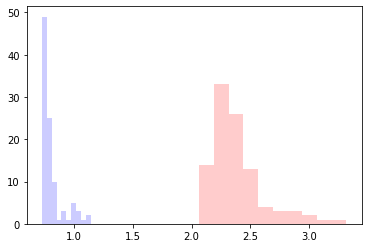

In [5]:
plt.hist(times1, color='r', alpha=0.2)
plt.hist(times2, color='b', alpha=0.2)

plt.show()

In [2]:
N = 100

cost_matrix = np.random.uniform(size=(N, N))

leximin_assigner = leximin_assignment.LeximinAssignmentHelperV3(
    cost_matrix, np.ones((N,))
)

assignments = leximin_assigner.solve(verbose=True)

Running from the beginning...
Number of agents assigned: 0 / 100
Current leximin: 1
Number of agents assigned: 1 / 100
Current leximin: 0.04867645966913714
Number of agents assigned: 2 / 100
Current leximin: 0.047317375603935896
Number of agents assigned: 3 / 100
Current leximin: 0.039126111432281396
Number of agents assigned: 4 / 100
Current leximin: 0.03492009594121803
Number of agents assigned: 5 / 100
Current leximin: 0.033794317335105295
Number of agents assigned: 6 / 100
Current leximin: 0.0334072926151201


In [3]:
assignments

(6,
 {0.04867645966913714: 1,
  0.047317375603935896: 1,
  0.039126111432281396: 1,
  0.03492009594121803: 1,
  0.033794317335105295: 1,
  0.0334072926151201: 1},
 0.0334072926151201)

In [4]:
agent_count, leximin_counts, c_star = assignments

leximin_assigner = leximin_assignment.LeximinAssignmentHelperV3(
    cost_matrix, np.ones((N,))
)

assignments = leximin_assigner.solve(
    leximin_counts, agent_count, c_star, verbose=True
)

Continuing from input data...
Number of agents assigned: 6 / 100
Current leximin: 0.0334072926151201
Number of agents assigned: 7 / 100
Current leximin: 0.03309033290941643
Number of agents assigned: 8 / 100
Current leximin: 0.03284334570370728
Number of agents assigned: 9 / 100
Current leximin: 0.030192773268711615
Number of agents assigned: 10 / 100
Current leximin: 0.029435237061361197
Number of agents assigned: 11 / 100
Current leximin: 0.029113797832714394
Number of agents assigned: 12 / 100
Current leximin: 0.02899486998162648
Number of agents assigned: 13 / 100
Current leximin: 0.028946693079416108
Number of agents assigned: 14 / 100
Current leximin: 0.028501380929072284
Number of agents assigned: 15 / 100
Current leximin: 0.02786372412310567
Number of agents assigned: 16 / 100
Current leximin: 0.027735566309419535
Number of agents assigned: 17 / 100
Current leximin: 0.027653156505342502
Number of agents assigned: 18 / 100
Current leximin: 0.02761404496330544
Number of agents as

In [5]:
assignments

array([34, 66, 62,  9, 10, 24, 97, 57, 52, 90, 63, 65, 94, 81,  7, 74, 33,
       47,  4, 92, 32, 55, 43, 49, 28, 59, 20, 96,  2, 13, 76, 89, 67, 53,
        8, 87, 80, 36, 88, 86, 39,  3, 48, 72,  5, 60, 12, 70, 22, 68, 27,
       99, 23, 83, 77, 85, 91, 14, 38, 42, 58, 18, 15, 73, 93, 98, 41, 25,
       44, 26, 54, 64,  0, 69, 51, 19, 95, 11, 61, 29, 40, 50, 82, 75, 78,
       71, 37,  6, 84, 45, 17,  1, 16, 31, 30, 46, 79, 21, 35, 56])

In [6]:
leximin_assigner = leximin_assignment.LeximinAssignmentHelperV3(
    cost_matrix, np.ones((N,))
)

complete_assignments = leximin_assigner.solve(verbose=True)
complete_assignments

Running from the beginning...
Number of agents assigned: 0 / 100
Current leximin: 1
Number of agents assigned: 1 / 100
Current leximin: 0.04867645966913714
Number of agents assigned: 2 / 100
Current leximin: 0.047317375603935896
Number of agents assigned: 3 / 100
Current leximin: 0.039126111432281396
Number of agents assigned: 4 / 100
Current leximin: 0.03492009594121803
Number of agents assigned: 5 / 100
Current leximin: 0.033794317335105295
Number of agents assigned: 6 / 100
Current leximin: 0.0334072926151201
Number of agents assigned: 7 / 100
Current leximin: 0.03309033290941643
Number of agents assigned: 8 / 100
Current leximin: 0.03284334570370728
Number of agents assigned: 9 / 100
Current leximin: 0.030192773268711615
Number of agents assigned: 10 / 100
Current leximin: 0.029435237061361197
Number of agents assigned: 11 / 100
Current leximin: 0.029113797832714394
Number of agents assigned: 12 / 100
Current leximin: 0.02899486998162648
Number of agents assigned: 13 / 100
Current 

array([34, 66, 62,  9, 10, 24, 97, 57, 52, 90, 63, 65, 94, 81,  7, 74, 33,
       47,  4, 92, 32, 55, 43, 49, 28, 59, 20, 96,  2, 13, 76, 89, 67, 53,
        8, 87, 80, 36, 88, 86, 39,  3, 48, 72,  5, 60, 12, 70, 22, 68, 27,
       99, 23, 83, 77, 85, 91, 14, 38, 42, 58, 18, 15, 73, 93, 98, 41, 25,
       44, 26, 54, 64,  0, 69, 51, 19, 95, 11, 61, 29, 40, 50, 82, 75, 78,
       71, 37,  6, 84, 45, 17,  1, 16, 31, 30, 46, 79, 21, 35, 56])

In [8]:
np.array_equal(assignments, complete_assignments)

True